In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


hdhxhxfx

In [10]:
df = pd.read_csv('/content/drive/MyDrive/UIS/movie_metadata.csv')
df = df.dropna()
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64  
 1

In [ ]:
df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
       'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
       'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
       'India', 'Mexico', 'Brazil', 'Finland', 'Norway', 'Iceland',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan'], dtype=object)

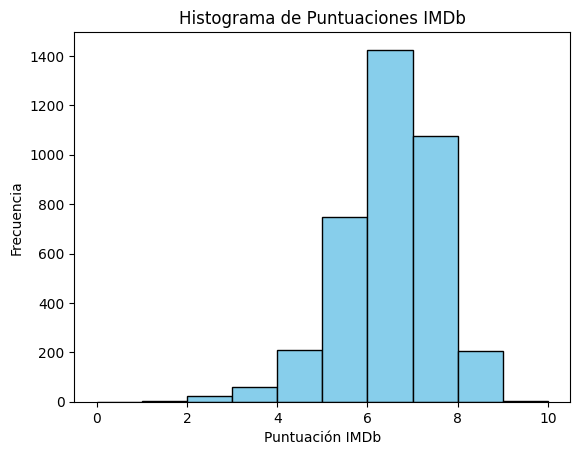

In [ ]:
# Definir los bins manualmente (ajústalos según la escala de imdb_score)
bins = [0,1 , 2, 3, 4, 5, 6, 7, 8, 9, 10]  # IMDb usa una escala de 0 a 10

# Crear histograma
plt.hist(df['imdb_score'], bins=bins, edgecolor='black', color='skyblue')

# Etiquetas y título
plt.title("Histograma de Puntuaciones IMDb")
plt.xlabel("Puntuación IMDb")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

<h2>Preguntas obligadas:<br></h2>
¿La mayoría de las películas tienen calificaciones altas o bajas?<br>
¿Existen películas con calificaciones extremadamente bajas o altas?<br><br>

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

Histogramas y lineas de puntos:


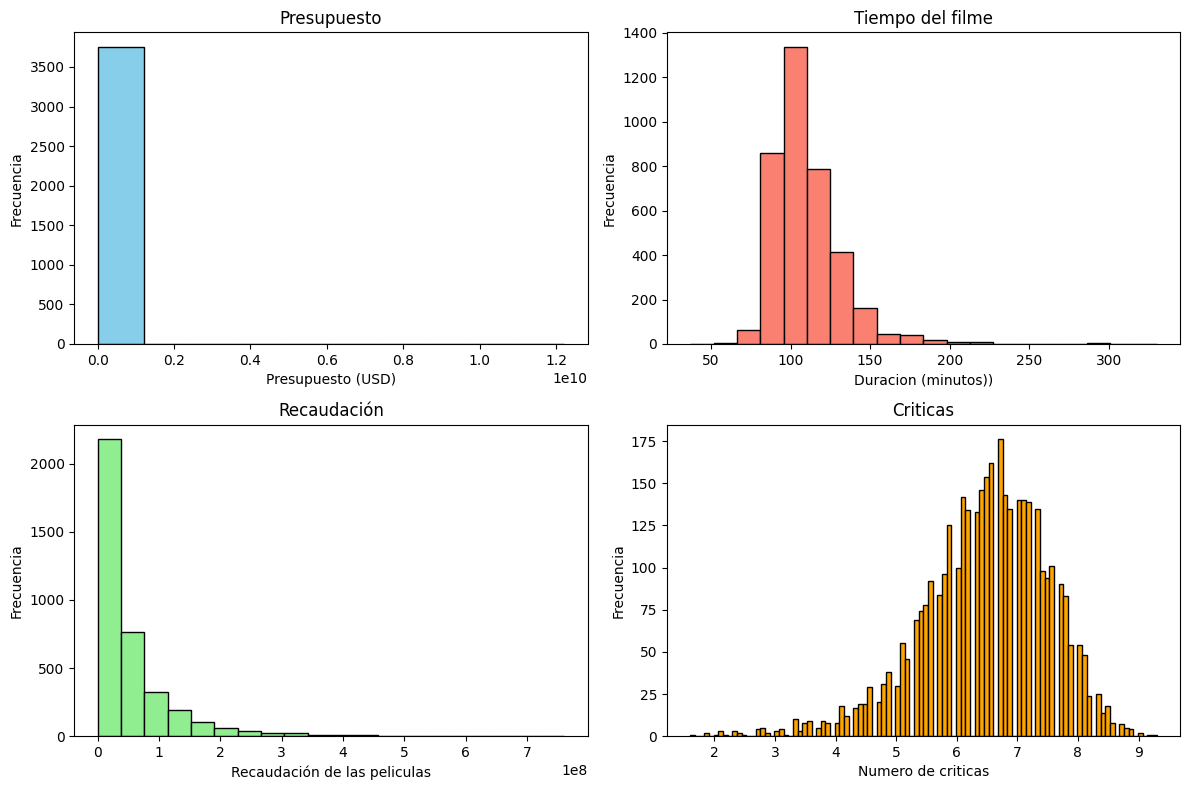

In [21]:

# Creamos la figura que pueda contener 4 graficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histograma para el presupuesto de la pelicula
axes[0, 0].hist(df['budget'], bins=10, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Presupuesto')
axes[0, 0].set_xlabel('Presupuesto (USD)')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para la duracion de la pelicula
axes[0, 1].hist(df['duration'], bins=20, edgecolor='black', color='salmon')
axes[0, 1].set_title('Tiempo del filme')
axes[0, 1].set_xlabel('Duracion (minutos))')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para la recaudacion de la pelicula
axes[1, 0].hist(df['gross'], bins=20, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Recaudación')
axes[1, 0].set_xlabel('Recaudación de las peliculas')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para el numero de criticas de peliculas
axes[1, 1].hist(df['imdb_score'], bins=100, edgecolor='black', color='orange')
axes[1, 1].set_title('Criticas')
axes[1, 1].set_xlabel('Numero de criticas')
axes[1, 1].set_ylabel('Frecuencia')

# configurar pobsibles errores
plt.tight_layout()

# Mostrar la grafica
plt.show()